In [1]:
##importing data
import unicodecsv
with open('train.csv') as f:
    reader=unicodecsv.DictReader(f)
    data_titanic=list(reader)
print data_titanic[0]

{u'Fare': u'7.25', u'Name': u'Braund, Mr. Owen Harris', u'Embarked': u'S', u'Age': u'22', u'Parch': u'0', u'Pclass': u'3', u'Sex': u'male', u'Survived': u'0', u'SibSp': u'1', u'PassengerId': u'1', u'Ticket': u'A/5 21171', u'Cabin': u''}


In [2]:
##cleaning and organizing the data
y=[]
data_titanic1=[]
for data in data_titanic:
    feature_float=['Fare','Age','SibSp','Parch']
    add=True
    for feature in feature_float:
        try:
            data[feature]=float(data[feature])
        except:
            add=False
            data[feature]=0.0
    #if not add:
      #  continue
    y.append(int(data['Survived']))
    data.pop('Survived')
    feature_remove=['Name','PassengerId','Ticket','Cabin','Embarked']
    for feature in feature_remove:
        data.pop(feature)
    data_titanic1.append(data)


In [3]:
print data_titanic[0]
print y[0]

{u'Fare': 7.25, u'Age': 22.0, u'Parch': 0.0, u'Pclass': u'3', u'Sex': u'male', u'SibSp': 1.0}
0


In [4]:
from sklearn.feature_extraction import DictVectorizer
vec=DictVectorizer()
X=vec.fit_transform(data_titanic1).toarray()

In [5]:
print X[0]
print X[1]

[ 22.     7.25   0.     0.     0.     1.     0.     1.     1.  ]
[ 38.      71.2833   0.       1.       0.       0.       1.       0.       1.    ]


In [6]:
##splitting the data
from sklearn.cross_validation import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.3)
X_train_pca=X_train
X_test_pca=X_test
X_pca=X

In [7]:
##performing Pca
from sklearn.decomposition import PCA
pca=PCA(n_components=4).fit(X_train)
X_train_pca=pca.transform(X_train)
X_test_pca=pca.transform(X_test)
X_pca=pca.transform(X)
print pca.explained_variance_ratio_[0]
print X_pca[0]

0.867021360257
[-23.75719969  -0.4207502   -0.35900413   0.7205169 ]


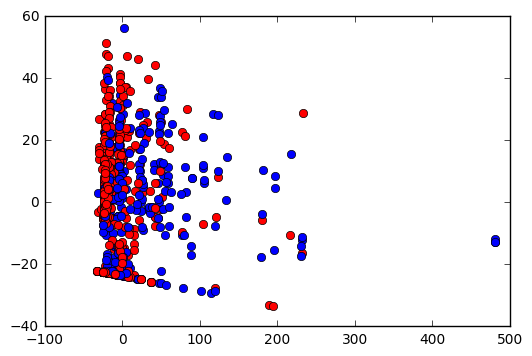

In [8]:
##plotting the data
color=['ro','bo','go']
from matplotlib import pyplot as plt
for i in range(len(X_pca)):
    plt.plot(X_pca[i,0],X_pca[i,1],color[y[i]])
plt.show()

In [14]:
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier,RandomForestClassifier
from sklearn.grid_search import GridSearchCV
from sklearn.naive_bayes import GaussianNB
from time import time
params=[
  {'C': [1, 10, 100, 1000], 'kernel': ['linear']},
  {'C': [1, 10, 100, 1000], 'gamma': [0.01,0.1,0.001, 0.0001], 'kernel': ['rbf']},
 ]

parameters = {'n_estimators': [15,20,30,100,120], 
              'max_features': ['log2', 'auto'], 
              'criterion': ['entropy', 'gini'],
              'max_depth': [2, 3, 5, 10], 
              'min_samples_split': [2,  5,10,15,20],
             }
clf=RandomForestClassifier(n_estimators=155,min_samples_split=10)
#clf=GridSearchCV(RandomForestClassifier(),parameters)
#clf=GridSearchCV(SVC(),params)
#clf=GaussianNB()
#clf=AdaBoostClassifier()
#clf=DecisionTreeClassifier(min_samples_split=12)
#clf=SVC(kernel='rbf',gamma=0.001,C=100)
t0=time()
clf1.fit(X,y)
print "Training time is",round(time()-t0,3)
t1=time()
pred=clf1.predict(X_test)
print "Predicting time",round(time()-t1,3)
print clf1.score(X_test,y_test)

Training time is 0.148
Predicting time 0.003
0.917910447761


## Decision Tree gives an accuracy of 84%

In [11]:
import pickle
clf1=pickle.load(open('best_titanic.pkl','r'))

In [ ]:
print clf
clf.fit(X_train,y_train)
clf.score(X_test,y_test)

In [12]:
from sklearn.cross_validation import KFold
from sklearn.metrics import make_scorer, accuracy_score
import numpy as np
y=np.array(y,dtype=int)
def run_kfold(clf):
    kf = KFold(891, n_folds=10)
    print kf
    outcomes = []
    fold = 0
    for train_index, test_index in kf:
        fold += 1
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        clf1.fit(X_train, y_train)
        predictions = clf1.predict(X_test)
        accuracy = accuracy_score(y_test, predictions)
        outcomes.append(accuracy)
        print("Fold {0} accuracy: {1}".format(fold, accuracy))     
    mean_outcome = np.mean(outcomes)
    print("Mean Accuracy: {0}".format(mean_outcome)) 

run_kfold(clf)

sklearn.cross_validation.KFold(n=891, n_folds=10, shuffle=False, random_state=None)
Fold 1 accuracy: 0.755555555556
Fold 2 accuracy: 0.831460674157
Fold 3 accuracy: 0.786516853933
Fold 4 accuracy: 0.865168539326
Fold 5 accuracy: 0.876404494382
Fold 6 accuracy: 0.842696629213
Fold 7 accuracy: 0.808988764045
Fold 8 accuracy: 0.786516853933
Fold 9 accuracy: 0.887640449438
Fold 10 accuracy: 0.831460674157
Mean Accuracy: 0.827240948814


In [ ]:
with open('test.csv') as f:
    reader=unicodecsv.DictReader(f)
    data_test=list(reader)

In [ ]:
Id=[]
for data in data_test:
    Id.append(data['PassengerId'])
    feature_float=['Fare','Age']
    for feature in feature_float:
        try:
            data[feature]=float(data[feature])
        except:
            data[feature]=0.0
    feature_remove=['Name','PassengerId','Ticket','Cabin','Embarked']
    for feature in feature_remove:
        data.pop(feature)
print Id[0]

In [ ]:
X_test_new=vec.transform(data_test).toarray()
print X_test_new[0]

In [ ]:
pred=clf.predict(X_test_new)

In [ ]:
pred[0:50]

In [ ]:
with open('result.csv','wb') as f:
    writer=unicodecsv.writer(f)
    writer.writerow(['PassengerId','Survived'])
    for i in range(len(Id)):
        writer.writerow([Id[i],pred[i]])
